In [18]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt



def rhs(x):
    return np.cos(2*pi*x)

def uex(x):
    return -(np.sin(pi*x)**2)/(2*pi**2)

def setBoundaries(x):
    M=len(x)
    h=x[2]-x[1]
    A = np.diag(np.ones(M-1),-1) -2*np.diag(np.ones(M)) + np.diag(np.ones(M-1),+1)
    A = A*1/(h**2)
    #periodic boundary conditions. 
    A[0,0]= 1
    A[0,1]= 0
    A[0,M-1]= 0
    
    A[-1,0] = 1/(h**2)
    A[-1,M-1] = -2/(h**2)
    A[-1,M-2] = 1/(h**2)
    
    return A

I discretize the domain with $x_0, \ldots, x_M$, so I have $M+1$ points. By periodic boundary conditions, I identify points $x_0$ and $x_M$, so I only need one of those in the computational domain. 

Hence I have a matrix of size $M$ and the unknowns vector $[u_0, \ldots, u_{M-1}]$. By periodicity, $u_{-1}=u_{M-1}$ and $u_{M}=u_0$.

So the first and last row of the matrix should correspond to $\frac{u_1-2 u_0 + u_{M-1}}{h^2}$ (at $i=0$) and $\frac{u_0 - 2u_{M-1}+u_{M-2}}{h^2}$ (at $i=M-1$) but in this way the resulting matrix is singular.

Indeed, with periodic boundary conditions, the problem does not have a unique solution, since if $u(x)$ is a solution, also $u(x) + c$ is a solution to the equation. 

To fix the constant $c$ I impose that $u(0)=0$. So I change the first and row of the system, and the first entry of the rhs $f$ to have $u_0=0$

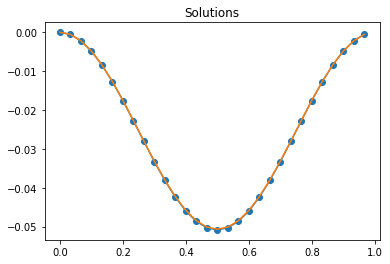

In [19]:
M = 30
x=np.linspace(0,1,M + 1) #x_0,...,x_M
x = x[0:-1] #x_0,...,x_{M-1}
b = rhs(x)
b[0]=0
A=setBoundaries(x)
#print(A)
u=np.linalg.solve(-A,b)
plt.plot(x,u,'-o',label = 'numerical')
plt.plot(x,uex(x),'-',label= 'analytical')
plt.title('Solutions')
plt.show()

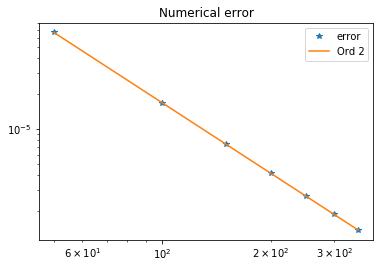

In [20]:
mrange = np.arange(50,400,50)
err = []
for M in mrange:
    x=np.linspace(0,1,M + 1) #x_0,...,x_M
    x = x[0:-1] #x_0,...,x_{M-1}
    b = rhs(x)
    b[0]=0
    A=setBoundaries(x)
    #print(A)
    u=np.linalg.solve(-A,b)
    err.append(np.linalg.norm(uex(x)-u,np.Inf))

plt.figure
plt.loglog(mrange,err,'*',label='error')
plt.loglog(mrange,err[-1]*(mrange/mrange[-1])**(-2),'-',label='Ord 2')
plt.legend()
plt.title('Numerical error')
plt.show()